# Sarah Fieck
## CPSC 542 - Assignment 1
This is where I did some "off roading code."
Mostly visuals that would not run locally

In [1]:
!pip install scikit-learn
!unzip new_flowers.zip

Archive:  new_flowers.zip
replace new_flowers/test/Daisy/test0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import warnings
warnings.filterwarnings('ignore')
!pip install --upgrade scipy

import numpy as np
import pandas as pd
# import keras
from plotnine import *
from PIL import Image
import glob
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from keras.datasets import mnist, fashion_mnist
from IPython.display import Image
import tensorflow.keras as kb
from tensorflow.keras import backend
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

from tensorflow.keras.preprocessing.image import load_img

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt


import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import shutil
import os

from tensorflow.keras import Model
from keras.preprocessing.text import Tokenizer
from pickle import dump

from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input


In [3]:
train_dir = './flowerdataset/train'

train_dai = './flowerdataset/train/Daisy'
train_lav = './flowerdataset/train/Lavender'
train_orc = './flowerdataset/train/Orchid'
train_ros = './flowerdataset/train/Rose'
train_sun = './flowerdataset/train/Sunflower'
train_tul = './flowerdataset/train/Tulip'
train_lil = './flowerdataset/train/Lilly'
train_lot = './flowerdataset/train/Lotus'
train_dan = './flowerdataset/train/Dandelion'

test_dir = './flowerdataset/test'

test_dai = './flowerdataset/test/Daisy'
test_lav = './flowerdataset/test/Lavender'
test_orc = './flowerdataset/test/Orchid'
test_ros = './flowerdataset/test/Rose'
test_sun = './flowerdataset/test/Sunflower'
test_tul = './flowerdataset/test/Tulip'
test_lil = './flowerdataset/test/Lilly'
test_lot = './flowerdataset/test/Lotus'
test_dan = './flowerdataset/test/Dandelion'

def fix_photo_size(i_directory, o_directory):
    count = 0
    os.makedirs(o_directory, exist_ok=True)
    for filename in os.listdir(i_directory):
      file_path = os.path.join(i_directory, filename)
      image = Image.open(file_path)
      new_image = image.resize((224, 224))
      # img_array = keras.preprocessing.image.img_to_array(new_image)
      new_image.save(f'{o_directory}/test{count}.jpg')
      count+= 1


n_train_dir = './new_flowers/train'

n_train_dai = './new_flowers/train/Daisy'
n_train_orc = './new_flowers/train/Orchid'
n_train_ros = './new_flowers/train/Rose'
n_train_sun = './new_flowers/train/Sunflower'
n_train_tul = './new_flowers/train/Tulip'
n_train_lil = './new_flowers/train/Lilly'
n_train_lot = './new_flowers/train/Lotus'
n_train_dan = './new_flowers/train/Dandelion'

n_test_dir = './new_flowers/test'

n_test_dai = './new_flowers/test/Daisy'
n_test_orc = './new_flowers/test/Orchid'
n_test_ros = './new_flowers/test/Rose'
n_test_sun = './new_flowers/test/Sunflower'
n_test_tul = './new_flowers/test/Tulip'
n_test_lil = './new_flowers/test/Lilly'
n_test_lot = './new_flowers/test/Lotus'
n_test_dan = './new_flowers/test/Dandelion'

In [4]:
import os
def count_images_per_class(ds):
    classes = os.listdir(ds)
    class_image_count = {}
    for class_name in classes:
        class_dir = os.path.join(ds, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            num_images = len(images)
            class_image_count[class_name] = num_images
    return class_image_count

# Figure out a way to code a bar plot that measures counts of flower images
train_class = count_images_per_class(n_train_dir)
train_metric = pd.DataFrame(train_class.items(), columns=['Flower','Count'])
train_metric['Dataset'] = 'Train'
print(train_metric)

print("")

test_class = count_images_per_class(n_test_dir)
test_metric = pd.DataFrame(test_class.items(), columns=['Flower','Count'])
test_metric['Dataset'] = 'Test'
print(test_metric)



      Flower  Count Dataset
0      Daisy    400   Train
1     Orchid    400   Train
2      Lotus    400   Train
3      Lilly    400   Train
4       Rose    400   Train
5      Tulip    400   Train
6  Sunflower    400   Train
7  Dandelion    400   Train

      Flower  Count Dataset
0      Daisy     92    Test
1     Orchid     89    Test
2      Lotus    100    Test
3      Lilly    100    Test
4       Rose    100    Test
5      Tulip    100    Test
6  Sunflower    100    Test
7  Dandelion    100    Test


In [5]:
# Joining the two to make the visual feature training & testing data
vis_df = pd.concat([train_metric, test_metric])
vis_df

,Flower,Count,Dataset
0,Daisy,400,Train
1,Orchid,400,Train
2,Lotus,400,Train
3,Lilly,400,Train
4,Rose,400,Train
5,Tulip,400,Train
6,Sunflower,400,Train
7,Dandelion,400,Train
0,Daisy,92,Test
1,Orchid,89,Test


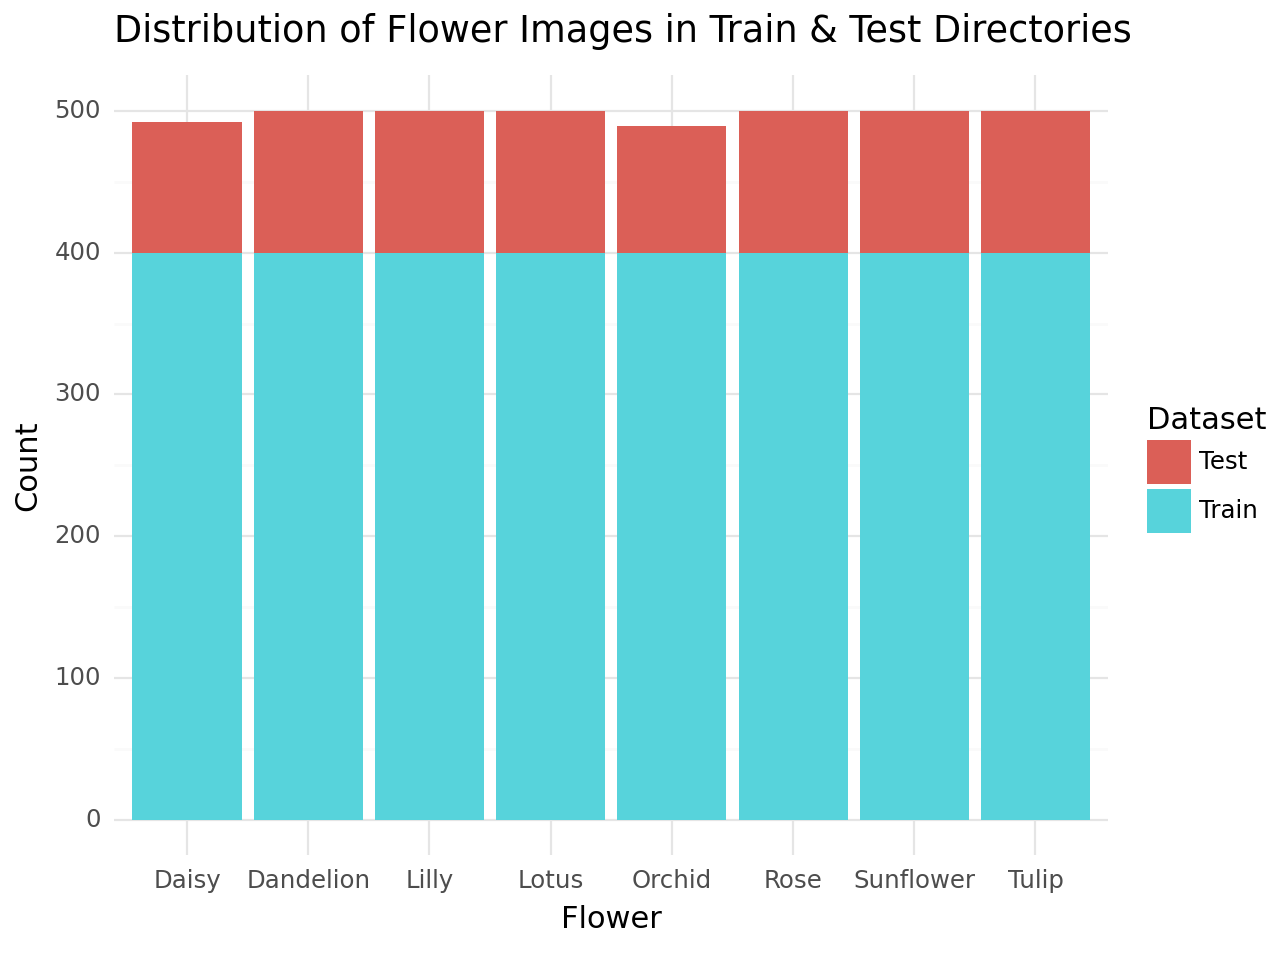

<Figure Size: (640 x 480)>

In [6]:
# Visual of Class Distribution

(ggplot(vis_df, aes(x = 'Flower', y = 'Count', fill = 'Dataset'))
  + geom_bar(stat = 'identity')
  + labs(title = "Distribution of Flower Images in Train & Test Directories")
  + theme_minimal())

In [ ]:
batch_size = 32
image_width = 224
image_height = 224


# Regular VGG16 Model: https://keras.io/api/applications/vgg/
model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    classes = 8,
    classifier_activation="relu"
)

for layer in model.layers:
   layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Regularization
x = Dropout(0.4)(model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)

# Flattening & Prediction Layer
x = Flatten()(x)
predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_ds = train_datagen.flow_from_directory(n_train_dir,
                                              target_size = (image_width, image_height),
                                              batch_size= 32,
                                              class_mode = 'categorical')

test_ds = test_datagen.flow_from_directory(n_test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3200 images belonging to 8 classes.
Found 781 images belonging to 8 classes.


In [ ]:
loaded_model = tf.keras.models.load_model('assignment1_model4.h5')
loaded_model.trainable = True
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Tried to do the confusion matrix

In [ ]:
pred = loaded_model.predict(test_ds)

25/25 [==============================] - 416s 17s/step


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, loaded_model.predict(x).reshape(-1)])
  labels = np.concatenate([labels, tf.argmax(y, axis=-1)])

tf.math.confusion_matrix(labels=labels, predictions=predictions)

1/1 [==============================] - 16s 16s/step


In [ ]:
# confusion matrix, did not work :(

labels = ["Daisy","Dandelion","Lilly","Lotus","Orchid","Rose","Sunflower","Tulip"]
label_to_index = {label: i for i, label in enumerate(labels)}
y_true = [label_to_index[label] for label in labels]

pred_classes = np.argmax(pred, axis=1)
unique_values = np.unique(pred_classes)
print(unique_values)

label_to_index.update({str(class_index): class_index for class_index in unique_values})

pred_classes_numeric = [label_to_index[str(label)] for label in pred_classes]


NameError: name 'pred' is not defined